test test

In [1]:
import os

# Aktuelles Arbeitsverzeichnis abrufen
current_directory = os.getcwd()

# Arbeitsverzeichnis ausgeben
print("Aktuelles Arbeitsverzeichnis:", current_directory)

git config --global user.email "frederik.beck23@imperial.ac.uk"



Aktuelles Arbeitsverzeichnis: c:\Users\frede\Documents\FYP\Frederiks-Jupyter-Space\notebooks and Python Scripts\Membrane_Theory_1


In [32]:
#change working directory to same as file
change_work_directory = False

if change_work_directory:

    import os

    # Absoluten Pfad der Python-Datei erhalten
    script_path = os.path.abspath(__file__)

    # Verzeichnis extrahieren
    script_dir = os.path.dirname(script_path)

    # Arbeitsverzeichnis ändern
    os.chdir(script_dir)


# Cyclindrical Shell under V,Q,M,T Load
## Computing of Membrane Actions with Membrane Theory, analyticly

## M,V,N,T states from global equilibrium

## Loadcase 1:
- V = 4 MN = 4E6 N
- M = 33MNm = 33E9 Nmm
- Q = 1.76 MN = 1.76E6 N

\begin{align*}
- V(z) &= V = \text{const.} = 4\text{MN} \\
- M(z) &= M + V \cdot z = 33\text{MNm} + 1.76\text{MN} \cdot z \\
- Q(z) &= Q = \text{const.} = 1.76\text{MN}
\end{align*}

## Loadcase 2:
- V = 4 MN = 4E6 N
- M = 30MNm = 30E9 Nmm
- Q = 1.6 MN = 1.6E6 N
- T = 22 MNm = 22E0 Nmm

\begin{align*}
- V(z) &= V = \text{const.} = 4\text{MN} \\
- M(z) &= M + V \cdot z = 30\text{MNm} + 1.6\text{MN} \cdot z \\
- Q(z) &= Q = \text{const.} = 1.6\text{MN} \\
- T(z) &= T = \text{const.} = 22\text{MNm}
\end{align*}

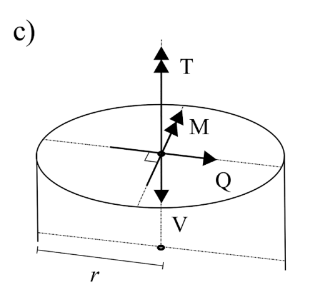





In [33]:
#enter Loads here. Signs: V leads to compression, therefore: -; M and Q leads to tension at theta = 0 therefore: +; 


""" LC1 inputs
V_input = -4.0E6    # vertical force
M_input = 33.0E9   # Moment
Q_input = 1.76E6   # shear force
T_input = 0.0  # Torque
alpha = 0.0 # Rotation of force
"""

# LC2 inputs
V_input = -4.0E6    # vertical force
M_input = 30.0E9   # Moment
Q_input = 1.6E6   # shear force
T_input = 22.0E9   # Torque
alpha = 0.0 # Rotation of force


In [34]:
execute_Diagrams = False

if execute_Diagrams:

    #Plot global M,V,T,Q Diagrams

    import numpy as np
    import matplotlib.pyplot as plt

    # Define z values
    z_values = np.linspace(0, 36000, 1000)

    # Define functions for LC1
    def V_lc1(z):
        return -4.0  # Constant function

    def M_lc1(z):
        return 33.0 + 1.76* z/1000  # 33MNm + 4MN * z

    def Q_lc1(z):
        return 1.76  # Constant function

    def T_lc1(z):
        return 0.0  # Constant function

    # Define functions for LC2
    def V_lc2(z):
        return -4.0  # Constant function

    def M_lc2(z):
        return 30.0 + 1.6 * z/1000  # 25MNm + 3MN * z

    def Q_lc2(z):
        return 1.6  # Constant function

    def T_lc2(z):
        return 22.0  # Constant function

    # Define colors
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']

    # Define titles and functions for each load case
    load_cases = {
        'LC1': {'titles': ['Vertical Force [MN]', 'Moment [MNm]', 'Shear Force [MN]', 'Torque [MNm]'],
                'functions': [V_lc1, M_lc1, Q_lc1, T_lc1]},
        'LC2': {'titles': ['Vertical Force [MN]', 'Moment [MNm]', 'Shear Force [MN]', 'Torque [MNm]'],
                'functions': [V_lc2, M_lc2, Q_lc2, T_lc2]}
    }

    # Plot diagrams for each load case
    for lc, data in load_cases.items():
        plt.figure(figsize=(16, 4))
        for i, (func, title, color) in enumerate(zip(data['functions'], data['titles'], colors), start=1):
            plt.subplot(1, 4, i)
            plt.plot([func(z) for z in z_values], z_values, color='black', linewidth=2)
            plt.fill_betweenx(z_values, [func(z) for z in z_values], color=color, alpha=0.5)
            plt.ylabel('z (mm)')
            plt.xlabel(f'{title}')
            plt.title(f'{title}')
            plt.gca().spines['top'].set_visible(False)
            plt.gca().spines['right'].set_visible(False)
            plt.gca().tick_params(axis='both', which='both', length=0)
            plt.gca().invert_yaxis()  # Invert x axis to rotate
        plt.suptitle(f'{lc}', fontsize=16)
        plt.tight_layout()

    plt.show()


Membrane Theory Reactions to M,N,V,T states from Lecture I.II.
-Assume Linear Constitutive Relations and for Bending Euler-Bernoulli Beam-Hypothesis

## Bending Moment M
$$ N_{z}(θ,z) = \frac{M}{r^2 \pi} \cdot \cos(θ) $$

## Uniform axial Force V
$$N_z(θ,z) = \frac{V}{2\pi r}$$



## Transverse Shear V
$$ N_{z}(θ,z) = \frac{V \cdot z}{r^2 \pi} \cdot \cos(θ) $$

$$N_{z\theta}(\theta, z) = -\frac{V}{r\pi} \cdot \sin(\theta)$$

## Unifrom Torque T
$$N_{z\theta}(θ,z) = \frac{T}{2\pi r^2}$$

# Membrane Theory equations applied for our Loading Case

$$N_{\theta}(\theta, z) = \cancel{p_n} \cdot r = 0$$

$$N_{z\theta}(\theta, z) = -\int \left[\cancel{\frac{\delta p_n}{\delta \theta}} + \cancel{p_\theta}\right] \, dz + f_1(\theta) = f_1(\theta)$$

$$N_z(\theta, z) = -\int \left[\frac{1}{r} \left(\frac{\delta N_{z\theta}}{\delta \theta}\right) + \cancel{p_z} \right] \, dz + f_2(\theta) = -\int \left[\frac{1}{r} \left(\frac{\delta f_1}{\delta \theta}\right)\right] \, dz + f_2(\theta)$$




## Bending Moment M
$$N_{\theta}(\theta, z) = 0$$

$$N_{z\theta}(\theta, z) = f_1(\theta) = 0$$

$$N_z(\theta, z) = \cancel{ -\int \left[\frac{1}{r} \left(\frac{\delta f_1}{\delta \theta}\right)\right] \, dz} + f_2(\theta) =\frac{M}{r^2 \pi} \cdot \cos(θ) $$


## Uniform axial Force V

$$N_{\theta}(\theta, z) = 0$$

$$N_{z\theta}(\theta, z) = f_1(\theta) = 0$$

$$N_z(\theta, z) = \cancel{ -\int \left[\frac{1}{r} \left(\frac{\delta f_1}{\delta \theta}\right)\right] \, dz} + f_2(\theta) =\frac{V}{2\pi r}$$


## Transverse Shear V

$$N_{\theta}(\theta, z) = 0$$

$$N_{z\theta}(\theta, z) = f_1(\theta) = - \frac{V}{r\pi} \cdot \sin(\theta)$$

$$N_z(\theta, z) = -\int \left[\frac{1}{r} \left(\frac{\delta f_1}{\delta \theta}\right)\right] \, dz + f_2(\theta) = \int \left[\frac{1}{r} \left(\frac{\delta (\frac{V}{r\pi} \cdot \sin(\theta))}{\delta \theta}\right)\right] \, dz + f_2(\theta) = \frac{V \cdot z}{r^2 \pi} \cdot \cos(θ) $$

$$N_z(\theta, 0) = 0 = f_2(\theta) $$


## Uniform Torque T

$$N_{\theta}(\theta, z) = 0$$

$$N_{z\theta}(\theta, 0) = f_1(\theta) = \frac{T}{2\pi r^2}$$

$$N_z(\theta, z) = \cancel{ -\int \left[\frac{1}{r} \left(\frac{\delta f_1}{\delta \theta}\right)\right] \, dz + f_2(\theta)} =0$$

In [35]:
#load tower geometry from csv file

import pandas as pd

# Relativer Dateipfad
file_path = "Geometry_Benchmark_Tower.txt"

# Daten einlesen
geometry_table = pd.read_csv(file_path, sep=" ", decimal=".")

# Jetzt enthält geometry_table_reduced nur die Zeilen mit Strake_ID zwischen 107 und 109


# Neue Spalte "radius_at_mid" hinzufügen
geometry_table["radius_at_mid"] = (geometry_table["d1"] + geometry_table["d2"]) / 4

# Neue Spalte "z_coord_bottom" hinzufügen mit Z-Koordinate am unteren Rand je strake
geometry_table["z_coord_bottom"] = geometry_table["h"].cumsum()

# Konvertieren aller Spalten in numerische Werte
geometry_table = geometry_table.apply(pd.to_numeric, errors='coerce')

# Daten anzeigen
print(geometry_table)


#Check Height
# Summe der Spalte "h" berechnen
sum_h = geometry_table["h"].sum()

# Summe ausgeben
print("Total Height, sum h = ", sum_h)

#



    Strake_ID     h      d1      d2   t        β       g    h.1      i  \
0         101   600  4145.0  4145.0  50  0.00000   41.45   1.86  0.045   
1         102  2319  4145.0  4257.9  13  0.02434  161.64  14.03  0.087   
2         103  2569  4257.9  4393.4  13  0.02637  166.43  15.32  0.092   
3         104  2684  4393.4  4535.1  14  0.02639  159.49  15.19  0.095   
4         105  2675  4535.1  4676.2  14  0.02637  164.54  14.90  0.091   
5         106  2416  4676.2  4803.7  14  0.02638  169.34  13.27  0.078   
6         107  2657  4803.7  4943.9  14  0.02638  174.12  14.39  0.083   
7         108  2648  4943.9  5083.7  15  0.02639  167.18  13.66  0.082   
8         109  2639  5083.7  5222.9  15  0.02637  171.84  13.43  0.078   
9         110  2630  5222.9  5361.7  15  0.02638  176.47  13.20  0.075   
10        111  2621  5361.7  5500.0  15  0.02638  181.09  12.99  0.072   
11        112  2068  5500.0  5500.0  15  0.00000  183.33  10.18  0.056   
12        113  2067  5500.0  5500.0  1

In [36]:
#function to assign radius r depending on z-coordinate. Using radius at middle height of each strake.

import pandas as pd

# Annahme: geometry_table ist Ihre dataframe-Tabelle

# Funktion zum Auswählen des entsprechenden Radius basierend auf dem "z"-Wert
def select_radius(z):
    for idx, row in geometry_table.iterrows():
        if row['z_coord_bottom'] >= z:
            return row['radius_at_mid']
    return None

# Testen der Funktion für einen bestimmten "z"-Wert
z_value = 8323.4
selected_radius = select_radius(z_value)
print(f'Für z = {z_value} wurde der Radius ausgewählt: {selected_radius}')

# Funktion zum Auswählen der Strake-ID basierend auf dem "z"-Wert
def select_strakeID(z):
    for idx, row in geometry_table.iterrows():
        if row['z_coord_bottom'] >= z:
            return row['Strake_ID']
    return None

# Testen der Funktion für einen bestimmten "z"-Wert
z_value = 8323.4
selected_strakeID = select_strakeID(z_value)
print(f'Für z = {z_value} wurde die Strake-ID ausgewählt: {selected_strakeID}')



Für z = 8323.4 wurde der Radius ausgewählt: 2302.825
Für z = 8323.4 wurde die Strake-ID ausgewählt: 105.0


In [37]:
import math

#function to calculate membrane force per unit length from a V force

def membrane_force_from_vertical_force(V, r):
    """
    Calculate membrane force given V force and radius.

    Parameters:
        V (float): Vertical force.
        r (float): Radius.

    Returns:
        float: Membrane force.
    """
    return V / (2.0 * math.pi * r)



#function to calculate membrane force per unit length from a moment

def membrane_force_from_moment(M, r, alpha, theta):
    """
    Calculate membrane force given moment, radius, and angles.

    Parameters:
        M (float): Moment.
        r (float): Radius.
        alpha (float): Angle of the moment.
        theta (float): Angle of polar coordinate direction and moment direction.

    Returns:
        float: Membrane force.
    """
    return M / (r**2.0 * math.pi) * math.cos(theta - alpha)



#function to calculate membrane force per unit length from a shear Force

def membrane_force_from_shear_force(Q, r, z, alpha, theta):
    """
    Calculate membrane forces given shear force, radius, height coordinate, and angles.

    Parameters:
        Q (float): shear force.
        r (float): Radius.
        z (float): Height coordinate.
        alpha (float): Rotation of force.
        theta (float): Angle.

    Returns:
        float: Membrane force N_z.
        float: Membrane force N_z_theta.
    """
    N_z = Q * z / (math.pi * r ** 2.0) * math.cos(theta - alpha)
    N_z_theta = - Q / (math.pi * r) * math.sin(theta - alpha)
    return N_z, N_z_theta



#function to calculate membrane force per unit length from a Torque

def membrane_force_from_torque(T, r):
    """
    Calculate membrane forces given shear force, radius, height coordinate, and angles.

    Parameters:
        T (float): Torsion-Moment.
        r (float): Radius.
      

    Returns:
        float: Membrane force N_z_theta.
    """
    N_z_theta = T / (2.0 * math.pi * r**2)
    return N_z_theta



In [38]:
#run the following test functions only if required. Set run_examples = True therefore

run_examples = False

if run_examples:

    # Example usage:
    V = 10  # Example vertical force
    r = 5   # Example radius
    N_z = membrane_force_from_vertical_force(V, r)
    print("From V Force: Membrane force N_z:", N_z)

    # Example usage:
    M = 20    # Example moment
    r = 5     # Example radius
    alpha = 0 # Example angle of the moment
    theta = math.pi  # Example angle between vertical direction and moment direction
    N_z = membrane_force_from_moment(M, r, alpha, theta)
    print("From Moment: Membrane force N_z:", N_z)


    # Example usage:
    Q = 15   # Example shear force
    r = 5    # Example radius
    z = 10   # Example height coordinate
    alpha = 0  # Example rotation of force
    theta = math.pi  # Example angle
    N_z, N_z_theta = membrane_force_from_shear_force(Q, r, z, alpha, theta)
    print("From shear Froce: Membrane force N_z:", N_z)
    print("From shear Force: Membrane force N_z_theta:", N_z_theta)

    # Example usage:
    T = 15   # Example shear force
    r = 5    # Example radius
    N_z_theta = membrane_force_from_torque(T,r)
    print("From Torque: Membrane force N_z_theta:", N_z_theta)

In [39]:
#Calculate Membrane Stress at many points of the tower

import pandas as pd
import numpy as np


# Direktes Hinzufügen der Werte zu z_values und Aufsteigend sortieren
z_values = np.sort(np.unique(np.concatenate([np.arange(0, sum_h, sum_h / 360), geometry_table['z_coord_bottom'], geometry_table['z_coord_bottom'] + 1]))[:-1]).astype(float)


# Generate theta_values from 0 to 2*pi with small angles
theta_values = np.arange(0, 2*np.pi, np.pi/60)

# Calculate membrane forces for each combination of theta and z values
results = []
for theta in theta_values:
    for z in z_values:

   

        r = select_radius(z)
        #r = calculate_radius(z) #activate for interpolation

        # Calculate membrane forces
        N_z_vertical = membrane_force_from_vertical_force(V_input, r)
        N_z_moment = membrane_force_from_moment(M_input, r, alpha, theta)
        N_z_shear, N_z_theta_shear = membrane_force_from_shear_force(Q_input, r, z, alpha, theta)
        N_z_theta_torque = membrane_force_from_torque(T_input, r)

        # Convert polar coordinates to Cartesian coordinates
        x_coord = np.cos(theta) * r
        y_coord = np.sin(theta) * r

        results.append({
            'z': z,
            'theta': theta,
            'r': r, 
            'X_Coord': x_coord,
            'Y_Coord': y_coord,   
            'N_z_vertical': N_z_vertical,
            'N_z_moment': N_z_moment,
            'N_z_shear': N_z_shear,
            'N_z_theta_shear': N_z_theta_shear,
            'N_z_theta_torque': N_z_theta_torque,
            'N_z_total': N_z_vertical + N_z_moment + N_z_shear,
            'N_z_theta_total': N_z_theta_shear + N_z_theta_torque,
            'Strake_ID': select_strakeID(z)
        })
# Create DataFrame
df = pd.DataFrame(results)

In [40]:
create_Subset = False

if create_Subset:

    #Create Subset of dataframe to select strake

    # Subset des DataFrame basierend auf der Bedingung für Strake-ID
    subset_df = df[(df['Strake_ID'] >= 114) & (df['Strake_ID'] <= 114)]



In [41]:
execute_3DScatter = False

if execute_3DScatter:

    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib.cm import ScalarMappable

    def plot_3d_scatter(df, x_col, y_col, z_col, color_col, title=None, marker_size=20, vmin=None, vmax=None):
        # Get the values from the DataFrame
        x_values = subset_df[x_col]
        y_values = subset_df[y_col]
        z_values = subset_df[z_col]
        color_values = subset_df[color_col]

        # Plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')


        scatter = ax.scatter(x_values, y_values, z_values, c=color_values, cmap='coolwarm', s=marker_size, vmin=vmin, vmax=vmax)
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.set_zlabel(z_col)
        ax.invert_zaxis()  # Invert the vertical axis
        if title:
            plt.title(title)
        cbar = plt.colorbar(ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax)), ax=ax, label=color_col)
        cbar_ticks = [vmin, 0, vmax]
        cbar.set_ticks(cbar_ticks)

        # Set the aspect ratio
        ax.set_box_aspect([1,1,1])

        # Set the axis limits to ensure equal scaling
        # Minimaler Wert von z
        min_z = subset_df['z'].min()

        # Maximaler Wert von z
        max_z = subset_df['z'].max()


        ax.set_xlim3d(min(-(max_z-min_z)/2,-3000), max((max_z-min_z)/2,3000))
        ax.set_ylim3d(min(-(max_z-min_z)/2,-3000), max((max_z-min_z)/2,3000))
        ax.set_zlim3d(max(max_z,min_z + 6000), min_z)

        plt.show()

    # Example usage
    # Find min and max values directly in the DataFrame
    min_value = subset_df[['N_z_vertical', 'N_z_moment', 'N_z_shear', 'N_z_total']].min().min()
    max_value = subset_df[['N_z_vertical', 'N_z_moment', 'N_z_shear', 'N_z_total']].max().max()
    max_value = max(-min_value,max_value)

    # Example usage with min and max values
    plot_3d_scatter(subset_df, 'X_Coord', 'Y_Coord', 'z', 'N_z_vertical', title='N_z_vertical', vmin=-max_value, vmax=max_value)
    plot_3d_scatter(subset_df, 'X_Coord', 'Y_Coord', 'z', 'N_z_moment', title='N_z_moment', vmin=-max_value, vmax=max_value)
    plot_3d_scatter(subset_df, 'X_Coord', 'Y_Coord', 'z', 'N_z_shear', title='N_z_shear', vmin=-max_value, vmax=max_value)
    plot_3d_scatter(subset_df, 'X_Coord', 'Y_Coord', 'z', 'N_z_total', title='N_z_total', vmin=-max_value, vmax=max_value)

    # Find min and max values across all columns
    min_value = subset_df[['N_z_theta_shear', 'N_z_theta_torque', 'N_z_theta_total']].min().min()
    max_value = subset_df[['N_z_theta_shear', 'N_z_theta_torque', 'N_z_theta_total']].max().max()
    max_value = max(-min_value,max_value)

    plot_3d_scatter(subset_df, 'X_Coord', 'Y_Coord', 'z', 'N_z_theta_shear', title='N_z_theta_shear', vmin=-max_value, vmax=max_value)
    plot_3d_scatter(subset_df, 'X_Coord', 'Y_Coord', 'z', 'N_z_theta_torque', title='N_z_theta_torque', vmin=-max_value, vmax=max_value)
    plot_3d_scatter(subset_df, 'X_Coord', 'Y_Coord', 'z', 'N_z_theta_total', title='N_z_theta_total', vmin=-max_value, vmax=max_value)



In [42]:
execute_3DScatter = False

if execute_3DScatter:

    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    def plot_3d_scatter_point_cloud(df, x_col, y_col, z_col, color_col, title=None, vmin=None, vmax=None):
        # Get the values from the DataFrame
        x_values = subset_df[x_col]
        y_values = subset_df[y_col]
        z_values = subset_df[z_col]
        color_values = subset_df[color_col]

        # Plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x_values, y_values, z_values, c=color_values, cmap='coolwarm', vmin=vmin, vmax=vmax)
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.set_zlabel(z_col)

        # Set x-tick labels for theta in terms of Pi
        ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
        ax.set_xticklabels(['0', 'π/2', 'π', '3π/2', '2π'])

        ax.invert_zaxis()  # Invert the shear axis
        if title:
            plt.title(title)
        plt.show()

        

    # Example usage

    # Find min and max values directly in the DataFrame
    min_value = subset_df[['N_z_vertical', 'N_z_moment', 'N_z_shear', 'N_z_total']].min().min()
    max_value = subset_df[['N_z_vertical', 'N_z_moment', 'N_z_shear', 'N_z_total']].max().max()
    max_value = max(-min_value,max_value)

    # Example usage with min and max values
    plot_3d_scatter_point_cloud(subset_df, 'theta', 'N_z_vertical', 'z', 'N_z_vertical', title='N_z_vertical', vmin=-max_value, vmax=max_value)
    plot_3d_scatter_point_cloud(subset_df, 'theta', 'N_z_moment', 'z', 'N_z_moment', title='N_z_moment', vmin=-max_value, vmax=max_value)
    plot_3d_scatter_point_cloud(subset_df, 'theta', 'N_z_shear', 'z', 'N_z_shear', title='N_z_shear', vmin=-max_value, vmax=max_value)
    plot_3d_scatter_point_cloud(subset_df, 'theta', 'N_z_total', 'z', 'N_z_total', title='N_z_total', vmin=-max_value, vmax=max_value)

    # Find min and max values across all columns
    min_value = subset_df[['N_z_theta_shear', 'N_z_theta_torque', 'N_z_theta_total']].min().min()
    max_value = subset_df[['N_z_theta_shear', 'N_z_theta_torque', 'N_z_theta_total']].max().max()
    max_value = max(-min_value,max_value)

    plot_3d_scatter_point_cloud(subset_df, 'theta', 'N_z_theta_shear', 'z', 'N_z_theta_shear', title='N_z_theta_shear', vmin=-max_value, vmax=max_value)
    plot_3d_scatter_point_cloud(subset_df, 'theta', 'N_z_theta_torque', 'z', 'N_z_theta_torque', title='N_z_theta_torque', vmin=-max_value, vmax=max_value)
    plot_3d_scatter_point_cloud(subset_df, 'theta', 'N_z_theta_total', 'z', 'N_z_theta_total', title='N_z_theta_total', vmin=-max_value, vmax=max_value)

# Check Results

In [43]:
execute_Checks = False

if execute_Checks:

    #Change the following z value to cut at different z-values from the global coordinate system 0-36000mm

    z_value = 25000 #only enter values that were calculated in df. for example steps of 50mm

    #Return radius
    # Testen der Funktion für einen bestimmten "z"-Wert
    selected_radius = select_radius(z_value)
    print(f'Für z = {z_value} wurde der Radius ausgewählt: {selected_radius}')

    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np

    def plot_section(df, y_column, z_value):
        subset_df = df[df['z'] == z_value]
        
        # Plot only points without connecting them with lines
        plt.scatter(subset_df['theta'], subset_df[y_column], s=5)
        
        plt.xlabel('Theta')
        plt.ylabel(y_column)
        plt.title(f'Plot of {y_column} against Theta at z={z_value}')

        # Convert theta values to radians and then to multiples of pi for better readability
        plt.xticks(np.linspace(0, 2*np.pi, num=5), ['0', 'π/2', 'π', '3π/2', '2π'])

        # Mark points at key theta values and write their values
        theta_values_to_mark = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
        for theta_val in theta_values_to_mark:
            index = np.abs(subset_df['theta'] - theta_val).idxmin()
            plt.scatter(subset_df['theta'][index], subset_df[y_column][index], color='red')
            plt.text(subset_df['theta'][index], subset_df[y_column][index], f'{subset_df[y_column][index]:.2f}', ha='right')

    
        plt.grid(True)
        plt.show()
        
        # Calculate and return the max value of the specified column
        max_value = subset_df[y_column].max()
        return max_value




    #Check if N_z from V force was computed correctly
    max_value_N_z = plot_section(df, 'N_z_vertical', z_value)
    print("Max value of N_z from V:", max_value_N_z)
    print('V = N_z * 2PI * r = ', max_value_N_z*selected_radius*2*math.pi/1000000, ' MN')

    #Check if N_z from Moment was computed correctly
    max_value_N_z = plot_section(df, 'N_z_moment', z_value)
    print("Max value of N_z from M:", max_value_N_z)
    print('M = N_z_max * PI * r^2 = ', max_value_N_z*selected_radius**2*math.pi/1000000000, ' MNm')

    #Check if N_z from Shear Force was computed correctly
    max_value_N_z = plot_section(df, 'N_z_shear', z_value)
    print("Max value of N_z from Q:", max_value_N_z)
    print('Q = N_z_max * PI * r^2 / z = ', max_value_N_z * selected_radius**2 * math.pi /z_value/1000000, ' MN')

    #Check if N_z_theta from Shear Force was computed correctly
    max_value_N_z_theta = plot_section(df, 'N_z_theta_shear', z_value)
    print("Max value of N_z_theta from Q:", max_value_N_z_theta)
    print('Q = N_z__theta_max * PI * r = ', max_value_N_z_theta*selected_radius*math.pi/1000000, ' MN')


    #Check if N_z_theta from Torque was computed correctly
    max_value_N_z_theta = plot_section(df, 'N_z_theta_torque', z_value)
    print("Max value of N_z_theta from V:", max_value_N_z_theta)
    print('T = N_z__theta_max * 2PI * r^2 = ', max_value_N_z_theta*2*selected_radius**2*math.pi/1000000000, ' MNm')


# Annex

In [44]:
execute_Annex = False

if execute_Annex:

    #function to assign radius r depending on z-coordinate. interpolation to meet actual geometry.

    import pandas as pd

    # Funktion zur Interpolation des Radius basierend auf "z"-Wert und β
    def calculate_radius(z):
        for idx, row in geometry_table.iterrows():
            if row['z_coord_bottom'] >= z:
                beta = row['β']
                radius = row['d2']/2 - (row['z_coord_bottom'] - z) * beta
                return radius
        return None

    # Testen der Funktion für einen bestimmten "z"-Wert
    z_value = 2950
    calculated_radius = calculate_radius(z_value)
    print(f'Für z = {z_value} wurde der Radius berechnet: {calculated_radius}')


In [45]:
if execute_Annex:

    import pandas as pd
    import matplotlib.pyplot as plt

    # Generate z values from 0 to 36000 in steps of 50
    z_values = range(0, 36001, 50)

    # Calculate radius values for each z value using select_radius
    radius_values_select = [select_radius(z) for z in z_values]

    # Calculate radius values for each z value using calculate_radius
    radius_values_calculate = [calculate_radius(z) for z in z_values]

    # Round the radius values to the nearest 0.5
    radius_values_select_rounded = [round(val * 2) / 2 for val in radius_values_select]

    # Get unique rounded radius values
    unique_radius_values = sorted(set(radius_values_select_rounded))

    # Plot 2D diagram with x and y axes swapped
    plt.plot(radius_values_select_rounded, z_values, label='average radius at each can')
    plt.plot(radius_values_calculate, z_values, label='actual geometry')
    plt.xlabel('Radius')
    plt.ylabel('z')
    plt.title('Radius vs z')

    # Set the y-axis limits from 0 to 36000
    #plt.xlim(0, max(radius_values_select_rounded) + 0.5)  # Adjust the limit based on the maximum rounded radius value

    # Invert the y-axis
    plt.gca().invert_yaxis()

    # Add vertical lines for z-coordinate values
    z_coords = geometry_table["z_coord_bottom"][:-1]  # Exclude the last value
    for z_coord in z_coords:
        plt.axhline(y=z_coord, color='lightgrey', linestyle=':', linewidth=0.5)  # Use dotted lines for a subtle grid effect

    # Add vertical lines for radius values
    for radius_val in unique_radius_values:
        plt.axvline(x=radius_val, color='lightgrey', linestyle=':', linewidth=0.5)  # Use dotted lines for a subtle grid effect

    # Add black lines at 0 and 36000
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # Add black line at z = 0
    plt.axhline(y=36000, color='black', linestyle='-', linewidth=0.5)  # Add black line at z = 36000

    # Remove tick labels for both axes
    plt.xticks([])
    plt.yticks([])

    # Add numbers on x-axis in two rows
    plt.gca().set_xticks(unique_radius_values)  # Show all unique labels
    plt.gca().set_xticklabels(unique_radius_values, rotation=90, ha='center')  # Rotate and center-align x-axis labels

    # Add numbers on y-axis with adjusted spacing
    plt.gca().set_yticks(z_coords)
    plt.gca().set_yticklabels(z_coords, rotation=0, va='center', ha='right')  # Rotate and right-align y-axis labels

    # Add number '0' to the right of the line
    plt.text(min(unique_radius_values) - 20, -800, '0', color='black', va='center', ha='left')

    # Add number '36000' to the right of the line
    plt.text(min(unique_radius_values) - 20, 37000, '36000', color='black', va='center', ha='left')

    # Move legend to top right
    plt.legend(loc='upper right')

    plt.show()
